# Laporan Poroyek Machine Learning - Dwi Krisnandi

Submission 2 Machine Learning Terapan - Sistem Rekomendasi Film

## Project Overview

Proyek pengembangan sistem rekomendasi film sangat penting untuk diselesaikan karena dapat meningkatkan pengalaman pengguna dengan memberikan rekomendasi yang lebih sesuai dengan minat, mengatasi masalah informasi berlebih yang sering dihadapi pengguna, serta memberikan manfaat ekonomi yang signifikan bagi perusahaan streaming. Sistem rekomendasi yang efektif dapat membantu pengguna menemukan film yang sesuai dengan preferensi mereka, sehingga mengurangi waktu pencarian dan meningkatkan kepuasan pengguna secara keseluruhan. Penelitian menunjukkan bahwa algoritma rekomendasi berbasis machine learning dapat meningkatkan akurasi dan kinerja rekomendasi, sementara sistem yang baik dapat menghemat biaya dan meningkatkan retensi pelanggan, seperti yang dialami oleh Netflix yang mengklaim menghemat sekitar $1 miliar per tahun berkat algoritma rekomendasi mereka. Selain itu, pemahaman yang lebih dalam tentang interaksi pengguna dengan algoritma rekomendasi dapat membantu pengembang menciptakan sistem yang lebih adaptif dan responsif terhadap kebutuhan pengguna, menjadikan proyek ini tidak hanya bermanfaat bagi pengguna tetapi juga memberikan keuntungan yang substansial bagi industri hiburan secara keseluruhan.

Sumber :
1. Zhang, "Movie Recommendation System Based on Machine Learning," *Highlights in Business Economics and Management* (2023). doi:10.54097/hbem.v21i.14740. Penelitian ini menunjukkan bagaimana sistem rekomendasi berbasis machine learning dapat meningkatkan akurasi dan kinerja rekomendasi dengan mengintegrasikan tag fitur.

2. Singh, A., & Soundarabai, "Collaborative filtering in movie Recommendation System based on Rating and Genre," *Ijarcce* (2017). doi:10.17148/ijarcce.2017.63107. Artikel ini membahas bagaimana sistem rekomendasi membantu merekomendasikan item berdasarkan kebutuhan pengguna yang bervariasi, mengurangi kebingungan dalam pencarian konten.

## Bussiness Understanding

**Problem Statements**

Dalam konteks proyek rekomendasi film, pernyataan masalah yang dihadapi adalah kesulitan pengguna dalam menemukan film yang sesuai dengan preferensi diantara banyaknya pilihan yang tersedia.

**Goals**

Tujuan dari proyek ini adalah untuk mengembangkan sistem rekomendasi film yang dapat memberikan saran yang relevan dan personal kepada pengguna. Diharapkan pengguna dapat dengan mudah menemukan film yang sesuai dengan selera merek.

**Solution Approach**

Untuk mencapai tujuan tersebut, dua pendekatan solusi yang dapat diterapkan adalah:

1. **Content-Based Filtering**: Pendekatan ini berfokus pada analisis karakteristik film yang telah ditonton oleh pengguna sebelumnya.

2. **Collaborative Filtering**: Pendekatan ini memanfaatkan data interaksi pengguna dengan film, seperti rating yang diberikan, untuk menemukan pola dan kesamaan antara pengguna.

## Data Understanding

### Download dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import json

# Membuat file kaggle.json dengan API token Anda
api_token = {"username":"krisnandi9998","key":"2d15c9eb5dd2bb51786765892d7218d9"}

# Membuat folder kaggle dan menyimpan token API
!mkdir -p ~/.kaggle
with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

# Mengubah izin akses untuk file API
!chmod 600 ~/.kaggle/kaggle.json

# Unduh dataset menggunakan API Kaggle
!kaggle datasets download -d rohan4050/movie-recommendation-data

Dataset URL: https://www.kaggle.com/datasets/rohan4050/movie-recommendation-data
License(s): unknown
 38% 5.00M/13.1M [00:00<00:00, 46.2MB/s]
100% 13.1M/13.1M [00:00<00:00, 74.2MB/s]


pada tahapan diatas adalah proses download dataset dari dengan menggunakan API Kaggle dan menghasilkan file dengan nama `movie-recommendation-data.zip`

### Ekstrak dataset

In [2]:
!unzip movie-recommendation-data.zip -d /content/movie

Archive:  movie-recommendation-data.zip
  inflating: /content/movie/ml-latest-small/links.csv  
  inflating: /content/movie/ml-latest-small/movies.csv  
  inflating: /content/movie/ml-latest-small/ratings.csv  
  inflating: /content/movie/ml-latest-small/tags.csv  
  inflating: /content/movie/movies_metadata.csv  


setelah di download dan mendapatkan file yang bernama movie-recommendation-data.zip dan kemudia di ekstrak kedalam folder `content/movie` dan berisikan beberapa file diantaranya
1. `movies_metadata.csv`
2. `links.csv`
3. `movies.csv`
4. `ratings.csv`
5. `tags.csv`

untuk file nomor 2 sampai 5 berada didalam folder `ml-latest-small`

### Membaca dataset

In [3]:
# Load dataset
path = 'movie/ml-latest-small/'
df_rating = pd.read_csv(path + 'ratings.csv')
df_movies = pd.read_csv(path + 'movies.csv')
df_links = pd.read_csv(path + 'links.csv')
df_tags = pd.read_csv(path + 'tags.csv')

pada kode di atas  dilakukan deklarasi variabel untuk setiap dataset yang akan dipakai dengan menggunakan `Pandas` dalam fungsi `read_csv`

In [4]:
print('Jumlah data link movie : ', len(df_links.movieId.unique()))
print('Jumlah data movie : ', len(df_movies.movieId.unique()))
print('Jumlah data ratings dari user : ', len(df_rating.userId.unique()))
print('Jumlah data ratings dari movie : ', len(df_rating.movieId.unique()))
print('Jumlah data tags : ', len(df_tags.movieId.unique()))

Jumlah data link movie :  9742
Jumlah data movie :  9742
Jumlah data ratings dari user :  610
Jumlah data ratings dari movie :  9724
Jumlah data tags :  1572


kode di atas memberikan informasi jumlah setiap variabel yang akan dipakai dengan penjelasan :
1. `link` yaitu daftar link pada setiap film
2. `movie` merupakan daftar film yang tersedia untuk sistem ini
3. `ratings` yaitu daftar penilaian dari film yang derikan pengguna
4. `tags` adalah daftar kata kunci dari film yang ada

In [5]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


kode ini bertujuan untuk melihat variabel dalam data rating

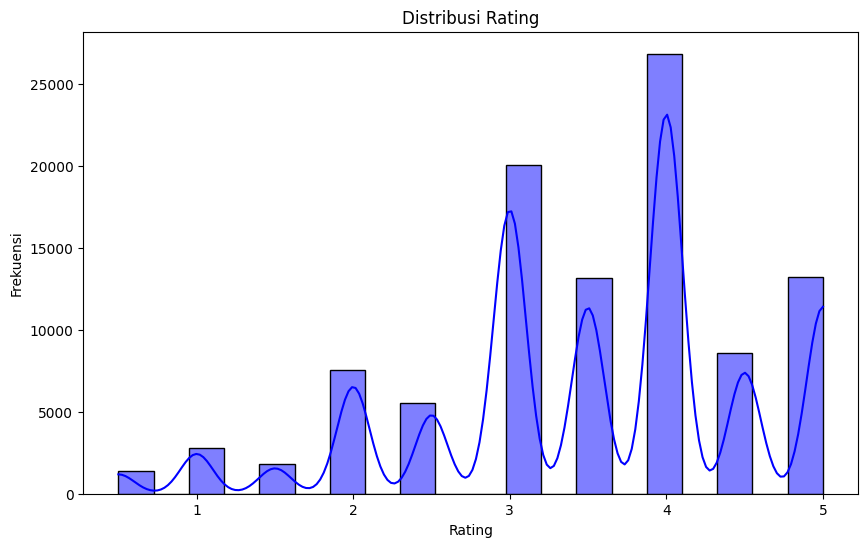

In [6]:
# Visualisasi distribusi rating
plt.figure(figsize=(10, 6))
sns.histplot(df_rating['rating'], bins=20, kde=True, color='blue')
plt.title("Distribusi Rating")
plt.xlabel("Rating")
plt.ylabel("Frekuensi")
plt.show()

dari hasil visualisi dapat diketahui bahwa rating berada diantara range 0-5 dengan frekuaensi paling banyak di kisaran 26.000

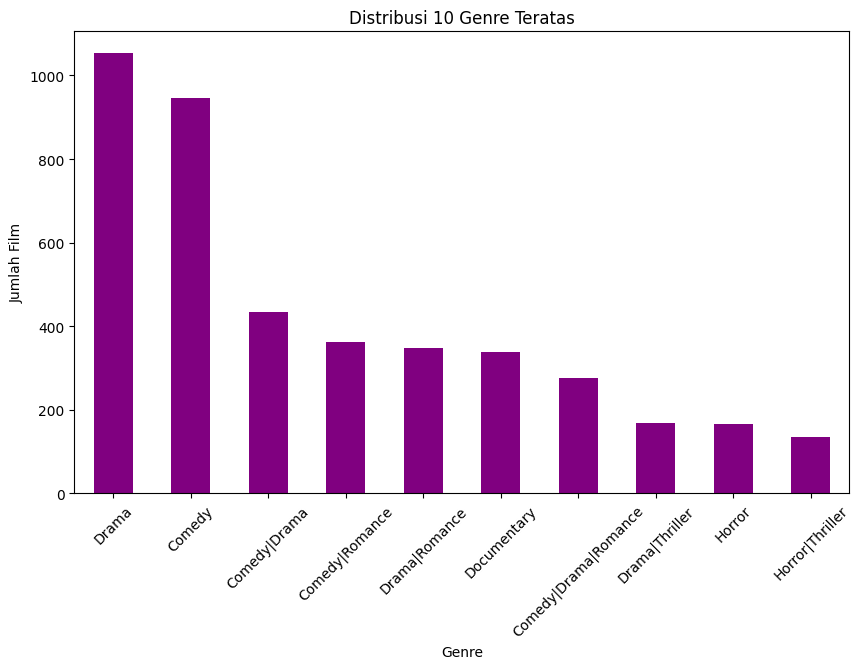

In [7]:
# Visualisasi distribusi genre
plt.figure(figsize=(10, 6))
df_movies['genres'].value_counts().head(10).plot(kind='bar', color='purple')
plt.title("Distribusi 10 Genre Teratas")
plt.xlabel("Genre")
plt.ylabel("Jumlah Film")
plt.xticks(rotation=45)
plt.show()

Dari hasil visualisasi di atas dapat diketahui 10 genre terbanyak dalam dataset ini dan genre **Drama** paling banyak dengan kisaran data 1000 lebih

## Data Preparation

### Data Preprocessing

Menggabungkan semua data dari beberapa file csv dengan fungsi `concate` berdasarkan `movieId` kedalam variabel `movie_all`

In [8]:
import numpy as np

# Menggabungkan seluruh movieID pada kategori movie
movie_all = np.concatenate((
    df_links.movieId.unique(),
    df_movies.movieId.unique(),
    df_rating.movieId.unique(),
    df_tags.movieId.unique(),
))

# Mengurutkan data dan menghapus data yang sama
movie_all = np.sort(np.unique(movie_all))

print('Jumlah seluruh data movie berdasarkan movieID: ', len(movie_all))

Jumlah seluruh data movie berdasarkan movieID:  9742


hasil dari penggabungan movie didapat sebanyak 9742 data

Menggabungkan semua data dari beberapa file csv dengan fungsi `concate` berdasarkan `userId` kedalam variabel `user_all`

In [9]:
# Menggabungkan seluruh userId
user_all = np.concatenate((
    df_rating.userId.unique(),
    df_tags.userId.unique(),

))

# Menghapus data yang sama kemudian mengurutkannya
user_all = np.sort(np.unique(user_all))

print('Jumlah seluruh user: ', len(user_all))

Jumlah seluruh user:  610


hasil dari penggabungan `user_all` didapat sebanyak 610 data

In [10]:
all_movie_name = pd.merge(df_rating, df_movies[['movieId','title','genres']], on='movieId', how='left')
all_movie_name

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),Drama|Horror|Thriller
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),Action|Crime|Thriller
100833,610,168250,5.0,1494273047,Get Out (2017),Horror
100834,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi


kode di atas bertujuan menggabungkan rating dengan movie berdasarkan movieId

In [11]:
# Menggabungkan dataframe genres dengan all_movie_name dan memasukkannya ke dalam variabel all_movie
all_movie = pd.merge(all_movie_name, df_tags[['movieId','tag']], on='movieId', how='left')
all_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old
...,...,...,...,...,...,...,...
285757,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,emotional
285758,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,gritty
285759,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,heartbreaking
285760,610,168252,5.0,1493846352,Logan (2017),Action|Sci-Fi,predictible plot


Menggabungkan dataframe tags dengan all_movie_name berdasarkan movieId dan memasukkannya ke dalam variabel all_movie

### Mengatasi Missing Value

In [12]:
all_movie.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,52549


dari hasil diatas terlihat ada data kosong dengan jumlah 52549 data dalam kolom tag

In [13]:
all_movie_clean = all_movie.dropna()
all_movie_clean.isnull().sum()

,0
userId,0
movieId,0
rating,0
timestamp,0
title,0
genres,0
tag,0


kode di atas dilakuakn penghapusan missing value dengan `dropna` yang bertujuan menghapus semua nilai kosong dalam dataset dan memasukan kedalam variabel baru yaitu `all_movie_clean`

In [14]:
print('Jumlah Setelah dibersihkan')
all_movie_clean.info()
print('\n')
print('Jumlah Sebelum dibersihkan')
all_movie.info()

Jumlah Setelah dibersihkan
<class 'pandas.core.frame.DataFrame'>
Index: 233213 entries, 0 to 285760
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     233213 non-null  int64  
 1   movieId    233213 non-null  int64  
 2   rating     233213 non-null  float64
 3   timestamp  233213 non-null  int64  
 4   title      233213 non-null  object 
 5   genres     233213 non-null  object 
 6   tag        233213 non-null  object 
dtypes: float64(1), int64(3), object(3)
memory usage: 14.2+ MB


Jumlah Sebelum dibersihkan
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285762 entries, 0 to 285761
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     285762 non-null  int64  
 1   movieId    285762 non-null  int64  
 2   rating     285762 non-null  float64
 3   timestamp  285762 non-null  int64  
 4   title      285762 non-null  object 
 5   genre

data di atas beruabh menjadi 233213 baris yang awalnya 285762 baris

In [15]:
fix_movie = all_movie_clean.sort_values('movieId', ascending=True)
fix_movie

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121430,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121431,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
121432,275,1,5.0,1049076484,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
35190,73,1,4.5,1464196374,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
263644,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster


kode diatas membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId

In [16]:
preparation = fix_movie
preparation.sort_values('movieId')

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44427,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
44426,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
44425,98,1,4.5,1532457849,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
209733,453,1,5.0,1005966797,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun
...,...,...,...,...,...,...,...
191470,414,187595,3.5,1527977920,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,star wars
81534,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,remaster
81531,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,anime
81532,184,193565,3.5,1537098554,Gintama: The Movie (2010),Action|Animation|Comedy|Sci-Fi,comedy


kode di atas membuat variabel preparation yang berisi dataframe fix_movie kemudian mengurutkan berdasarkan movieId

In [17]:
# Membuang data duplikat pada variabel preparation
preparation = preparation.drop_duplicates('movieId')
preparation

,userId,movieId,rating,timestamp,title,genres,tag
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar
187260,414,2,3.0,961594981,Jumanji (1995),Adventure|Children|Fantasy,fantasy
106951,240,3,4.0,849122858,Grumpier Old Men (1995),Comedy|Romance,old
19921,45,5,3.0,959625102,Father of the Bride Part II (1995),Comedy,pregnancy
115692,262,7,3.0,840306238,Sabrina (1995),Comedy|Romance,remake
...,...,...,...,...,...,...,...
27632,62,183611,4.0,1526244681,Game Night (2018),Action|Comedy|Crime|Horror,Comedy
174264,380,184471,3.0,1536872748,Tomb Raider (2018),Action|Adventure|Fantasy,Alicia Vikander
44721,98,187593,5.0,1532457913,Deadpool 2 (2018),Action|Comedy|Sci-Fi,sarcasm
263643,586,187595,5.0,1529899556,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi,Emilia Clarke


Selanjutnya untuk kode di atas, gunakan data unik untuk dimasukkan ke dalam proses pemodelan. serta hapus data duplicate dengan fungsi drop_duplicates() berdasarkan movieId

In [18]:
# Mengonversi data series ‘movieId’ menjadi dalam bentuk list
movie_id = preparation['movieId'].tolist()

# Mengonversi data series ‘title’ menjadi dalam bentuk list
movie_name = preparation['title'].tolist()

# Mengonversi data series ‘genres’ menjadi dalam bentuk list
movie_genre = preparation['genres'].tolist()

print(len(movie_id))
print(len(movie_name))
print(len(movie_genre))

1554
1554
1554


kode di atas melakukan konversi data series menjadi list. Dalam hal ini, menggunakan fungsi tolist() dari library numpy. Implementasikan

In [19]:
movie_new = pd.DataFrame({
    'id': movie_id,
    'movie_name': movie_name,
    'genre': movie_genre
})
movie_new

,id,movie_name,genre
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,5,Father of the Bride Part II (1995),Comedy
4,7,Sabrina (1995),Comedy|Romance
...,...,...,...
1549,183611,Game Night (2018),Action|Comedy|Crime|Horror
1550,184471,Tomb Raider (2018),Action|Adventure|Fantasy
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi
1552,187595,Solo: A Star Wars Story (2018),Action|Adventure|Children|Sci-Fi


## Modeling and Result

Proses modeling yang lakukan pada data ini adalah dengan membuat algoritma machine learning, yaitu `content based filtering` dan `collabrative filtering`. untuk algoritma `content based filtering` DIbuat dengan apa yang disukai pengguna, sedangkan untuk `content based filtering` DIbuat dengan memanfaatkan tingkat rating dari film tersebut.

### Model Development dengan Content Based Filtering

#### Menggunakan TFIDF

In [21]:
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()

# Melakukan perhitungan idf pada data genre
tf.fit(movie_new['genre'])

# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names_out()

array(['action', 'adventure', 'animation', 'children', 'comedy', 'crime',
       'documentary', 'drama', 'fantasy', 'fi', 'film', 'genres',
       'horror', 'imax', 'listed', 'musical', 'mystery', 'no', 'noir',
       'romance', 'sci', 'thriller', 'war', 'western'], dtype=object)

pada kode diatas bertujuan untuk menginisialisasi `TfidfVectorizer` selanjutnya melakukan perhitungan dan terakhir menampilkan fenre kedalam array

In [22]:
tfidf_matrix = tf.fit_transform(movie_new['genre'])
tfidf_matrix.shape

(1554, 24)

kode di atas melakukan transformasi ke bentuk matriks

In [23]:
tfidf_matrix.todense()

matrix([[0.        , 0.3983147 , 0.52247057, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.49497089, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.49413097, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.39639614, 0.40792706, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41107716, 0.        , 0.55489644, ..., 0.        , 0.        ,
         0.        ]])

Kode `tfidf_matrix.todense()` mengonversi matriks jarang hasil perhitungan TF-IDF menjadi matriks penuh yang menyimpan semua elemen, termasuk elemen nol

In [25]:
pd.DataFrame(
    tfidf_matrix.todense(),
    columns=tf.get_feature_names_out(),
    index=movie_new.movie_name
).sample(22, axis=1).sample(10, axis=0)

,mystery,listed,western,drama,horror,action,children,animation,film,crime,...,adventure,noir,no,fi,imax,thriller,comedy,musical,romance,documentary
movie_name,,,,,,,,,,,,,,,,,,,,,
Horse Feathers (1932),0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,0.0,0.000000,0.0
"Tale of Two Cities, A (1935)",0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
Ghost World (2001),0.000000,0.0,0.0,0.600342,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.799743,0.0,0.000000,0.0
Legal Eagles (1986),0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.678712,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.471248,0.0,0.563272,0.0
"39 Steps, The (1935)",0.745376,0.0,0.0,0.339161,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.573920,0.000000,0.0,0.000000,0.0
"Time to Kill, A (1996)",0.000000,0.0,0.0,0.508759,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.860909,0.000000,0.0,0.000000,0.0
Schindler's List (1993),0.000000,0.0,0.0,0.366404,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0
10 Things I Hate About You (1999),0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.641674,0.0,0.766978,0.0
25th Hour (2002),0.000000,0.0,0.0,0.462197,0.0,0.0,0.0,0.0,0.0,0.886777,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0


Kode diatas membuat DataFrame dari matriks TF-IDF dengan kolom berupa fitur (kata-kata) dan indeks berupa nama film, kemudian secara acak mengambil 22 kolom dan 10 baris dari DataFrame tersebut.

In [26]:
cosine_sim = cosine_similarity(tfidf_matrix)
cosine_sim

array([[1.        , 0.80472348, 0.1808617 , ..., 0.10142228, 0.42942348,
        0.37429223],
       [0.80472348, 1.        , 0.        , ..., 0.        , 0.53362862,
        0.        ],
       [0.1808617 , 0.        , 1.        , ..., 0.23089549, 0.        ,
        0.19208644],
       ...,
       [0.10142228, 0.        , 0.23089549, ..., 1.        , 0.6983388 ,
        0.83191943],
       [0.42942348, 0.53362862, 0.        , ..., 0.6983388 , 1.        ,
        0.58096161],
       [0.37429223, 0.        , 0.19208644, ..., 0.83191943, 0.58096161,
        1.        ]])

Kode `cosine_sim = cosine_similarity(tfidf_matrix)` menghitung dan menyimpan matriks kesamaan kosinus dari matriks TF-IDF untuk mengukur tingkat kesamaan antar dokumen

In [28]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=movie_new['movie_name'], columns=movie_new['movie_name'])
print('Shape:', cosine_sim_df.shape)

cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (1554, 1554)


movie_name,"Umbrellas of Cherbourg, The (Parapluies de Cherbourg, Les) (1964)",To Live (Huozhe) (1994),Cowboy Bebop: The Movie (Cowboy Bebop: Tengoku no Tobira) (2001),Look Who's Talking (1989),Inside Llewyn Davis (2013)
movie_name,,,,,
The Greatest Showman (2017),0.321583,1.000000,0.000000,0.000000,1.000000
Bridget Jones's Diary (2001),0.493380,0.433964,0.000000,0.900930,0.433964
Mr. Smith Goes to Washington (1939),0.321583,1.000000,0.000000,0.000000,1.000000
Anastasia (1956),0.321583,1.000000,0.000000,0.000000,1.000000
Copycat (1995),0.075181,0.233785,0.146459,0.000000,0.233785
West Side Story (1961),1.000000,0.321583,0.000000,0.392732,0.321583
Rosencrantz and Guildenstern Are Dead (1990),0.193060,0.600342,0.000000,0.513174,0.600342
"Croods, The (2013)",0.000000,0.000000,0.394829,0.252991,0.000000
And the Band Played On (1993),0.321583,1.000000,0.000000,0.000000,1.000000


Kode tersebut membuat DataFrame dari matriks kesamaan kosinus dengan indeks dan kolom berupa nama film, mencetak bentuk (dimensi) dari DataFrame, lalu menampilkan 5 kolom dan 10 baris secara acak dari DataFrame tersebut.

#### Membuat Rekomendasi

membuat fungsi movie_recommendations dengan beberapa parameter sebagai berikut:

* Nama_movie : Nama judul dari movie tersebut (index kemiripan dataframe).
* Similarity_data : Dataframe mengenai similarity yang telah kita didefinisikan sebelumnya
* Items : Nama dan fitur yang digunakan untuk mendefinisikan kemiripan, dalam hal ini adalah `movie_name` dan `genre`.
* k : Banyak rekomendasi yang ingin diberikan.

In [38]:
def movie_recommendations(nama_movie, similarity_data=cosine_sim_df, items=movie_new[['movie_name', 'genre']], k=10):


    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,nama_movie].to_numpy().argpartition(
        range(-1, -k, -1))

    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]

    # Drop nama_movie agar nama movie yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(nama_movie, errors='ignore')

    return pd.DataFrame(closest).merge(items).head(k)

In [39]:
film = 'Deadpool 2 (2018)'

In [40]:

movie_new[movie_new.movie_name.eq(film)]

,id,movie_name,genre
1551,187593,Deadpool 2 (2018),Action|Comedy|Sci-Fi


terapkan kode di atas untuk menemukan rekomendasi movie yang mirip dengan Deadpool 2 (2018) dengan genre yang ada pada tabel yaitu `Action|Comedy|Sci-Fi`.

In [41]:
movie_recommendations(film)

,movie_name,genre
0,Men in Black (a.k.a. MIB) (1997),Action|Comedy|Sci-Fi
1,Men in Black II (a.k.a. MIIB) (a.k.a. MIB 2) (...,Action|Comedy|Sci-Fi
2,Ghostbusters (a.k.a. Ghost Busters) (1984),Action|Comedy|Sci-Fi
3,Logan (2017),Action|Sci-Fi
4,Superman II (1980),Action|Sci-Fi
5,Terminator 2: Judgment Day (1991),Action|Sci-Fi
6,Planet of the Apes (1968),Action|Drama|Sci-Fi
7,Snowpiercer (2013),Action|Drama|Sci-Fi
8,"War of the Worlds, The (1953)",Action|Drama|Sci-Fi
9,Mystery Science Theater 3000: The Movie (1996),Comedy|Sci-Fi


Dari data diatas kita diberkan 10 rekomendasi, dari 10 rekomendasi dapat kita pisahkan dainataranya :
1.  Menampilkan 3 data sangat sesuai dengan genre Film `Deadpool 2 (2018)` yaitu `Action|Comedy|Sci-Fi`
2. Menampilkan 9 data dengan memuat genre `Action` dan `Sci-Fi` didalamnya
3. Menampikan 1 data dengan memuat genre `Comedy` dan `Sci-Fi` didalamnya

Berdasarkan hasil yang diberikan menurut saya **100%** akurasi yang diberikan berdasarkan genre dari film `Deadpool 2 (2018)`.

### Model Development dengan Collaborative Filtering

#### Melakukan data preparation untuk model Collaborative Filtering

In [47]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df_rating['userId'].unique().tolist()
print('list userID: ', user_ids)

# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded userID : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke userID: ', user_encoded_to_user)

list userID:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219

Kode diatas bertujuan mengambil daftar unik dari userId dalam dataframe, lalu membuat dua kamus yaitu satu untuk melakukan encoding dari userId ke angka, dan satu lagi untuk decoding dari angka kembali ke userId.

In [50]:
# Mengubah movieId menjadi list tanpa nilai yang sama
movie_ids = df_rating['movieId'].unique().tolist()

# Melakukan proses encoding movieId
movie_to_movie_encoded = {x: i for i, x in enumerate(movie_ids)}

# Melakukan proses encoding angka ke movieId
movie_encoded_to_movie = {i: x for i, x in enumerate(movie_ids)}

# Selanjutnya, petakan userId dan movieId ke dataframe yang berkaitan.

# Mapping userId ke dataframe genres
df_rating['genres'] = df_rating['userId'].map(user_to_user_encoded)

# Mapping movieD ke dataframe movies
df_rating['movies'] = df_rating['movieId'].map(movie_to_movie_encoded)

In [52]:
num_users = len(user_to_user_encoded)
print(num_users)

num_movie = len(movie_encoded_to_movie)
print(num_movie)

df_rating['ratings'] = df_rating['rating'].values.astype(np.float32)

min_rating = min(df_rating['rating'])

max_rating = max(df_rating['rating'])

print('Number of User: {}, Number of movie: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_movie, min_rating, max_rating
))

610
9724
Number of User: 610, Number of movie: 9724, Min Rating: 0.5, Max Rating: 5.0


Kode diatas mertujuan untuk mengecek beberapa hal dalam data seperti jumlah user, jumlah movie, dan mengubah nilai rating menjadi float, cek nilai minimum dan maximum

In [53]:
# Mengacak dataset
df = df_rating.sample(frac=1, random_state=42)
df

,userId,movieId,rating,timestamp,genres,movies,ratings
67037,432,77866,4.5,1335139641,431,4730,4.5
42175,288,474,3.0,978465565,287,474,3.0
93850,599,4351,3.0,1498524542,598,2631,3.0
6187,42,2987,4.0,996262677,41,194,4.0
12229,75,1610,4.0,1158989841,74,727,4.0
...,...,...,...,...,...,...,...
6265,42,4005,4.0,996259059,41,1873,4.0
54886,364,141,4.0,869443367,363,524,4.0
76820,480,6867,4.0,1179163171,479,2240,4.0
860,6,981,3.0,845556567,5,712,3.0


Kode tersebut mengacak seluruh dataset `df_rating` secara acak menggunakan parameter `frac=1` untuk menjaga ukuran dataset tetap sama dan `random_state=42` agar hasil acakan konsisten setiap kali dijalankan.

In [54]:
# Membuat variabel x untuk mencocokkan data genres  dan movies menjadi satu value
x = df[['genres', 'movies']].values

# Membuat variabel y untuk membuat ratings dari hasil
y = df['ratings'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values

# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)

print(x, y)

[[ 431 4730]
 [ 287  474]
 [ 598 2631]
 ...
 [ 479 2240]
 [   5  712]
 [ 102 2046]] [0.88888889 0.55555556 0.55555556 ... 0.77777778 0.55555556 1.        ]


Membagi data dengan 80% data training dan 20% data validasi

In [56]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

kode di atas mengimpor librari yang di butuhkan

In [57]:
class RecommenderNet(tf.keras.Model):

  # Insialisasi fungsi
  def __init__(self, num_users, num_movie, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_movie = num_movie
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.movie_embedding = layers.Embedding( # layer embeddings movies
        num_movie,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.movie_bias = layers.Embedding(num_movie, 1) # layer embedding movies bias

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    movie_vector = self.movie_embedding(inputs[:, 1]) # memanggil layer embedding 3
    movie_bias = self.movie_bias(inputs[:, 1]) # memanggil layer embedding 4

    dot_user_movie = tf.tensordot(user_vector, movie_vector, 2)

    x = dot_user_movie + user_bias + movie_bias

    return tf.nn.sigmoid(x) # activation sigmoid

Kelas RecommenderNet adalah model rekomendasi berbasis TensorFlow yang menggunakan embedding untuk merepresentasikan pengguna dan film. Model ini menghitung skor kesukaan dengan melakukan operasi dot product antara vektor embedding pengguna dan film, kemudian menambahkan bias dari pengguna dan film, lalu mengaplikasikan fungsi aktivasi sigmoid untuk menghasilkan prediksi.

## EVALUASI

In [71]:
model = RecommenderNet(num_users, num_movie, 50) # inisialisasi model

# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=10e-6),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

Kode diatas menginisialisasi model rekomendasi RecommenderNet dengan 50 dimensi embedding, lalu melakukan kompilasi model dengan menggunakan BinaryCrossentropy sebagai fungsi loss, optimizer Adam dengan learning rate sangat kecil (10e-6), dan metrik Root Mean Squared Error (RMSE) untuk mengukur performa model.

In [73]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Membuat callback
early_stopping = EarlyStopping(
    monitor='val_root_mean_squared_error',  # memonitor metrik validation loss
    patience=10,  # berhenti jika tidak ada perbaikan selama 5 epoch
    restore_best_weights=True  # mengembalikan bobot model terbaik
)

model_checkpoint = ModelCheckpoint(
    filepath='best_model.keras',  # lokasi penyimpanan model terbaik
    monitor='val_root_mean_squared_error',
    save_best_only=True  # hanya menyimpan model dengan performa terbaik
)

# Memulai training dengan callback
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 32,
    epochs = 100,
    validation_data = (x_val, y_val),
    callbacks=[early_stopping, model_checkpoint]  # menambahkan callback
)


Epoch 1/100
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 21s 8ms/step - loss: 0.6782 - root_mean_squared_error: 0.2717 - val_loss: 0.6846 - val_root_mean_squared_error: 0.2774
Epoch 2/100
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 0.6749 - root_mean_squared_error: 0.2698 - val_loss: 0.6827 - val_root_mean_squared_error: 0.2756
Epoch 3/100
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - loss: 0.6718 - root_mean_squared_error: 0.2666 - val_loss: 0.6806 - val_root_mean_squared_error: 0.2737
Epoch 4/100
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - loss: 0.6683 - root_mean_squared_error: 0.2628 - val_loss: 0.6781 - val_root_mean_squared_error: 0.2715
Epoch 5/100
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - loss: 0.6647 - root_mean_squared_error: 0.2604 - val_loss: 0.6754 - val_root_mean_squared_error: 0.2689
Epoch 6/100
2521/2521 ━━━━━━━━━━━━━━━━━━━━ 34s 8ms/step - loss: 0.6607 - root_mean_squared_error: 0.2557 - val_loss: 0.6722 - val_root_mean_squared_error: 0.2660
Epoch 7/100
2521/2521 ━━━━

Kode di atas melakukan pelatihan model dengan:

* EarlyStopping: Menghentikan pelatihan lebih awal jika performa validasi tidak membaik selama 10 epoch.
* ModelCheckpoint: Menyimpan model terbaik selama pelatihan ke file best_model.keras.

Pelatihan dilakukan dengan 100 epoch, batch size 32, dan menggunakan data validasi (x_val, y_val).

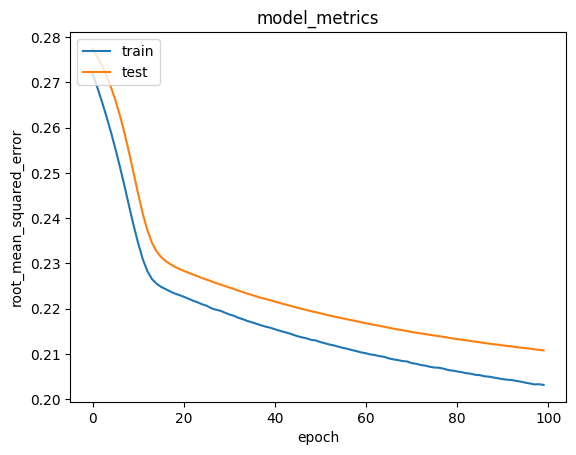

In [74]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [75]:
rmse = history.history['val_root_mean_squared_error'][-1]
print(f"RMSE: {rmse}")

RMSE: 0.21082481741905212


In [76]:
movie_df = movie_new
df = df_rating


user_id = df.userId.sample(1).iloc[0]
movie_watched_by_user = df[df.userId == user_id]


movie_not_watched = movie_df[~movie_df['id'].isin(movie_watched_by_user.movieId.values)]['id']
movie_not_watched = list(
    set(movie_not_watched)
    .intersection(set(movie_to_movie_encoded.keys()))
)

movie_not_watched = [[movie_to_movie_encoded.get(x)] for x in movie_not_watched]
user_encoder = user_to_user_encoded.get(user_id)
user_movie_array = np.hstack(
    ([[user_encoder]] * len(movie_not_watched), movie_not_watched)
)

In [77]:
ratings = model.predict(user_movie_array).flatten()

top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_movie_ids = [
    movie_encoded_to_movie.get(movie_not_watched[x][0]) for x in top_ratings_indices
]

print('Menampilkan rekomendasi dari user : {}'.format(user_id))
print('===' * 9)
print('Film dengan rating tinggi dari penggunaan')
print('----' * 8)

top_movie_user = (
    movie_watched_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .movieId.values
)

movie_df_rows = movie_df[movie_df['id'].isin(top_movie_user)]
for row in movie_df_rows.itertuples():
    print(row.movie_name, ':', row.genre)

print('----' * 8)
print('10 Teratas rekomendasi')
print('----' * 8)

recommended_movie = movie_df[movie_df['id'].isin(recommended_movie_ids)]
for row in recommended_movie.itertuples():
    print(row.movie_name, ':', row.genre)

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
Menampilkan rekomendasi dari user : 525
Film dengan rating tinggi dari penggunaan
--------------------------------
Ferris Bueller's Day Off (1986) : Comedy
Dogma (1999) : Adventure|Comedy|Fantasy
Virgin Suicides, The (1999) : Drama|Romance
--------------------------------
10 Teratas rekomendasi
--------------------------------
One Flew Over the Cuckoo's Nest (1975) : Drama
Aliens (1986) : Action|Adventure|Horror|Sci-Fi
Good, the Bad and the Ugly, The (Buono, il brutto, il cattivo, Il) (1966) : Action|Adventure|Western
Lawrence of Arabia (1962) : Adventure|Drama|War
Apocalypse Now (1979) : Action|Drama|War
Goodfellas (1990) : Crime|Drama
Alien (1979) : Horror|Sci-Fi
Godfather: Part II, The (1974) : Crime|Drama
Amadeus (1984) : Drama
Graduate, The (1967) : Comedy|Drama|Romance
